# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [530]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print data.head(10)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

   Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669   9656     7561     214              2674          1338
1   7057   9810     9568    1762              3293          1776
2   6353   8808     7684    2405              3516          7844
3  13265   1196     4221    6404               507          1788
4  22615   5410     7198    3915              1777          5185
5   9413   8259     5126     666              1795          1451
6  12126   3199     6975     480              3140           545
7   7579   4956     9426    1669              3321          2566
8   5963   3648     6192     425              1716           750
9   6006  11093    18881    1159              7425          2098
Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [532]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [533]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [45, 61, 253]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5181,22044,21531,1740,7353,4985
1,35942,38369,59598,3254,26701,2017
2,29526,7961,16966,432,363,1391


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.2
* Frozen: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

Selected indices are 45, 61 and 78.

#### Index 45
- The attribute that is more than mean is Milk and Delicatessan in majority.
- They shall prepare items with milk, burgers, sandwiches, pastries, etc.
- This appears to be *fast-food restaurant*.

#### Index 61
- Attributes like fresh, grocery, milk and detergents_paper appears to be high above mean values respectively.
- Anyways, not every chain preserves frozen foods due to their average demand. Hence, its value is little bit above mean value.
- Delicatessan appears to be good as compared to its mean value.
- This appears to be *Hypermarkets* in all to serve very large population.

#### Index 253
- In these attributes, `fresh` is heavily beyond its mean value, followed by grocery.
- Every single individual relies on groceries for their daily eating habits.
- Now a days, online stores have been in demand to deliver these groceries from door-to-door.
- If not, population will rely on grocery stores as well keeping other attributes/items aside.
- This appears to be online and physical grocery stores.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [534]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature

# Import `train_test_split`, `DecisionTreeRegressor` and `cross_val_score`.
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# IDEA:
#   Here, the ask is to pick one feature of a choice in order to check if a chosen
#     feature actually draw any conclusion.
#   So, considering every feature to predict the score in order to draw a conclusion what feature could help.

# We do have only 6 features.
headers = ["Fresh","Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicatessen"]
for header in headers:
    # Just load data (that skipped Channel and Region earlier)
    df = pd.DataFrame(data)
    # Remove current header from `headers` from data copy. axis = 1 means 0 rows and 1 columns
    new_data = df.drop(header, axis=1)

    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    # Here, random_state = 42 (standard value) and test_size = 0.25 (recommended)
    X_train, X_test, y_train, y_test = train_test_split(new_data,
                                                       data[header],
                                                       test_size = 0.25,
                                                       random_state= 42)

    # TODO: Create a decision tree regressor and fit it to the training set
    # Here, random_state = 42 (standard value)
    regressor = DecisionTreeRegressor(random_state=42)

    predictions_train = regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    y_pred = regressor.predict(X_test)

    score = regressor.score(X_test, y_test)
    feature_r2_score = r2_score(y_test, y_pred)

    print "when target variable is  %s, score from test set: %f" % (header, score)
    print "r2_score for feature: {} = {}\n".format(header, feature_r2_score)

when target variable is  Fresh, score from test set: -0.385750
r2_score for feature: Fresh = -0.385749710204

when target variable is  Milk, score from test set: 0.156275
r2_score for feature: Milk = 0.156275395017

when target variable is  Grocery, score from test set: 0.681884
r2_score for feature: Grocery = 0.681884008544

when target variable is  Frozen, score from test set: -0.210136
r2_score for feature: Frozen = -0.210135890125

when target variable is  Detergents_Paper, score from test set: 0.271667
r2_score for feature: Detergents_Paper = 0.271666980627

when target variable is  Delicatessen, score from test set: -2.254712
r2_score for feature: Delicatessen = -2.2547115372



#### Feature selection:

Since prediction score for Grocery is high among other features, Grocery is the choice.

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

Grocery is chosen since it has highest prediction score i.e 0.681884 among the other features.

Also, comparing r2 score for each features, Grocery is on the top list with score as 0.681884008544.

r2_score helps to determine how close data points fits near the regression line. Since there are 3 features that has co-efficient of determintation > 0 and they are Grocery, Detergents_Paper and Milk.

In general, feature selection works by calculating a score for each attribute, and then selecting only the attributes that have the best scores.
Choosing a predictable attribute can depict variance with other attributes. Even if this predictable attribute does not meet the threshold value, it can still be used in the prediction.

To understand correlation between these features, let us use scatter plot matrix:

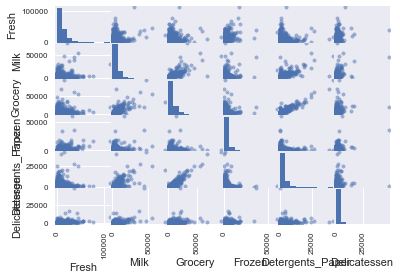

In [535]:
# Import scatter_matrix from pandas.tools.plotting
from matplotlib import pyplot
from pandas.tools.plotting import scatter_matrix

# Scatter Plot Matrix
matrix = pd.DataFrame(data, columns=headers)
scatter_matrix(matrix)

pyplot.show()

Froom the above plot matrix:

We can see Grocery, Detergents_Paper and Milk tends be correlated. Rest of the pair of features lie more near 0.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

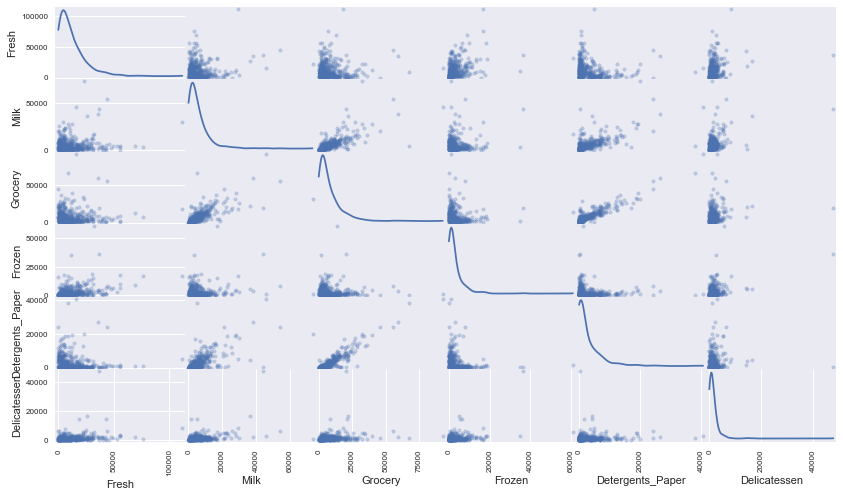

In [536]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

Scatter matrix plot helps to understand linear relationship between two variables.
However, most of these plots gets dense near 0. These data points makes difficult to understand if there is at all linear relationships.

Lets run a normaltest on our dataset:

In [537]:
# Tests whether a sample differs from a normal distribution.
# This function tests the null hypothesis that a sample comes from a normal distribution.

from scipy.stats.mstats import normaltest

for i in headers:
    feature = data[i]
    result = normaltest(feature, axis = 0)
    print i, ': ', result

Fresh :  NormaltestResult(statistic=274.34162662040899, pvalue=2.6759173855882678e-60)
Milk :  NormaltestResult(statistic=410.65364260210919, pvalue=6.7250345862368488e-90)
Grocery :  NormaltestResult(statistic=374.02330569249045, pvalue=6.0516125835768024e-82)
Frozen :  NormaltestResult(statistic=546.90399640685735, pvalue=1.7430350282461951e-119)
Detergents_Paper :  NormaltestResult(statistic=371.81993263618244, pvalue=1.8210735948002004e-81)
Delicatessen :  NormaltestResult(statistic=793.29833041667666, pvalue=5.4633157170835384e-173)


What did we notice here:

p-value for every feature is very small.

Generally, we count null hypothesis only when their p-value is greater than or equal to 0.05.
In this test, p-value is very small from this threshold value (0.05). So, the data does not comes from a normal distribution.

Since, there is some sort of association between these features.

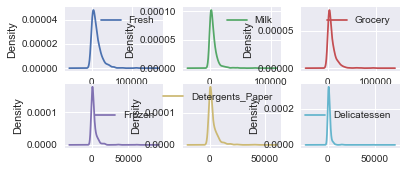

In [504]:
# implementing density plots to understand the distribution of each attribute
from matplotlib import pyplot

data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pyplot.show()

What do we notice here:

These plots shows right skewed distribution which do not matches normal distribution.

If the data have outliers or data is skewed to either left or right, the learning algorithm won't learn much about the data due to it's higher low values or higher top values and do poorly on unseen data.

So, we need to normalize data for each features.

In [538]:
# using pearson method of correlation as this is one of the standard method to determine correlation.
correlations = data.corr(method = 'pearson')

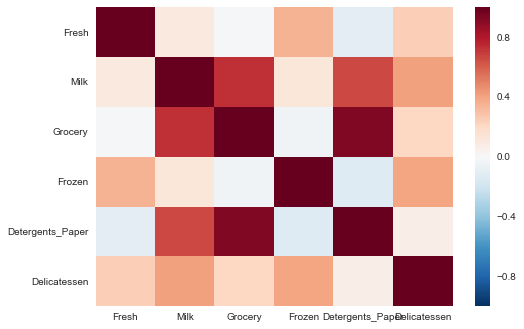

In [539]:
# Preparing to generate heatmap
import numpy as np
import seaborn as sns
np.random.seed(0)
sns.set()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(correlations)

Correlation between:
1. Detergents_Paper and Grocery is 0.925
2. Grocery and Milk is 0.728
3. Detergents_Paper and Milk is 0.662

Here, Grocery and Detergents_Paper do show significant correlation.
Milk is also correlated but not as strong as Grocery and Detergents_Paper.

So, when we can understand that the presence of Grocery and Detergents_Paper does boots the variance of some features.

If we consider establishments like markets, cafes, restaurants and houses, Grocery, Milk and Detergents_Paper contributes to their high amount of purchases.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

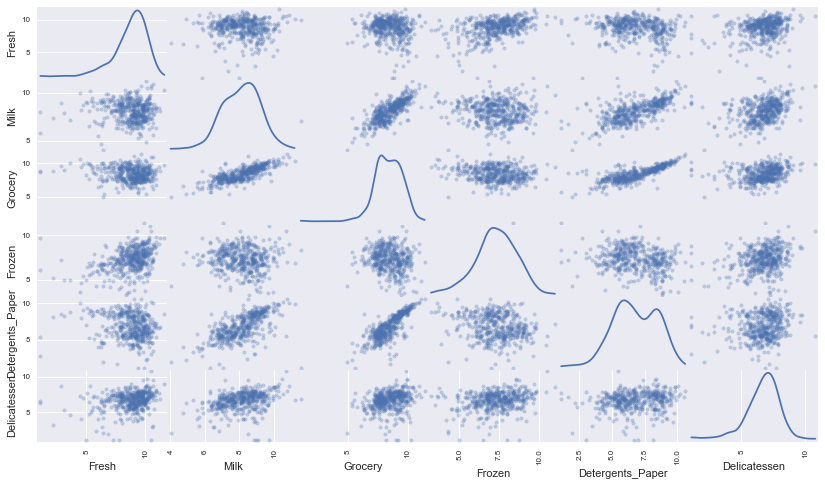

In [540]:
# TODO: Scale the data using the natural logarithm
# log_data = data.apply(lambda x: np.log(x + 1))
# OR
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
# log_samples = samples.apply(lambda x: np.log(x + 1))
# OR
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

Yes, features that were predicted to be correlated still exists.

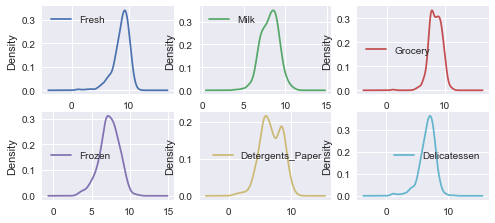

In [542]:
# Implementing the density plots again on log_data

from matplotlib import pyplot

log_data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pyplot.show()

##### Observation:

Apply density plot to log_data returns much normal distibution.

In [543]:
# Display the log-transformed sample data
# First level of scaled data with `log_data`
display(log_data)

# Second level of scaled data with `log_samples`
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
5,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008
6,9.403107,8.070594,8.850088,6.173786,8.051978,6.300786
7,8.933137,8.508354,9.151227,7.419980,8.108021,7.850104
8,8.693329,8.201934,8.731013,6.052089,7.447751,6.620073
9,8.700514,9.314070,9.845911,7.055313,8.912608,7.648740


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.552753,10.000796,9.977249,7.461640,8.902864,8.514189
1,10.489662,10.555005,10.995377,8.087640,10.192456,7.609367
2,10.293027,8.982310,9.738967,6.068426,5.894403,7.237778


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

Outlier step:  2.53350786861
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Outlier step:  2.31824827282
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Outlier step:  2.3988562138
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Outlier step:  2.34932750101
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Outlier step:  4.08935876094
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Outlier step:  2.24228065442
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


        Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
128  4.941642  9.087834   8.248791  4.955827          6.967909      1.098612
65   4.442651  9.950323  10.732651  3.583519         10.095388      7.260523
154  6.432940  4.007333   4.919981  4.317488          1.945910      2.079442
75   9.923192  7.036148   1.098612  8.390949          1.098612      6.882437
66   2.197225  7.335634   8.911530  5.164786          8.151333      3.295837
Indices of these outliers [128, 65, 154, 75, 66]


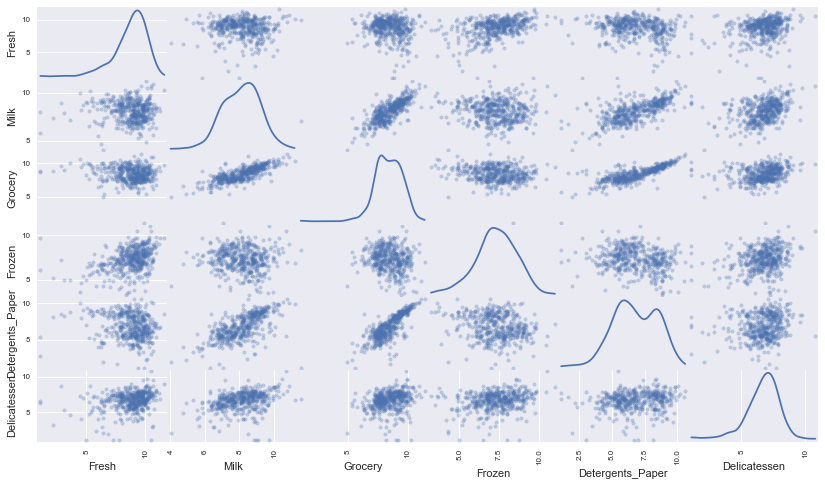

In [544]:
from scipy.stats import iqr
from collections import Counter

# Initials outliers with empty array
outliers = []
# { header: collection of outliers associated, ... }
outliers_dict = {}
# { outlier_1: collection of features having outlier_1, ... }
counter = Counter()

# For each feature, find the data points with extreme high or low values
for feature in log_data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)

    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)

    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    # Here, whether we use `iqr` or subtract Q1 from Q3, both returns same value.
    rng = iqr(log_data[feature], rng=(25, 75))
    step = 1.5 * rng
    print "Outlier step: ", step

    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(feature_outliers)
    
    # collect all outliers
    outliers_indices = feature_outliers.index.tolist()
    outliers += outliers_indices
    outliers_dict[feature] = outliers_indices

pyplot.show()

# Here, unqiue outliers are 42 in count.
# Now,
#   map indices with all those headers that appears in their respective outliers.
for index in outliers:
    counter[index] = []
    for header in outliers_dict:
        if index in outliers_dict[header]:
            counter[index].append(header)

# outliers that belongs to more than one feature.
outliers_i_want = dict((index,headers) for index, headers in counter.iteritems() if len(headers) > 1)

outliers = outliers_i_want.keys()

# select rows from data matchingin outliers
print log_data.iloc[outliers]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

print "Indices of these outliers {}".format(outliers)

In [545]:
# Inspecting data points for these outliers on log_data
display(pd.DataFrame(log_data.loc[outliers], columns = data.keys()))

# Inspecting data points for these outliers on original data
display(pd.DataFrame(data.loc[outliers], columns = data.keys()))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
128,140,8847,3823,142,1062,3
65,85,20959,45828,36,24231,1423
154,622,55,137,75,7,8
75,20398,1137,3,4407,3,975
66,9,1534,7417,175,3468,27


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

There are 5 data points considered as outliers for more than one features.

Lets us plot individual features to validate these outliers obtained:

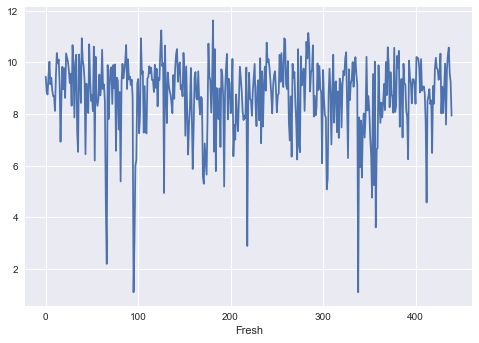

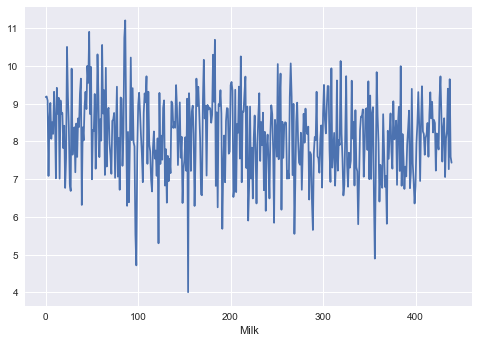

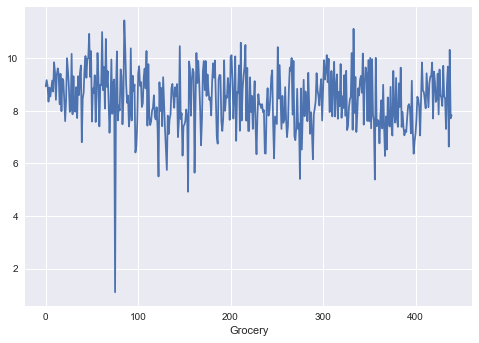

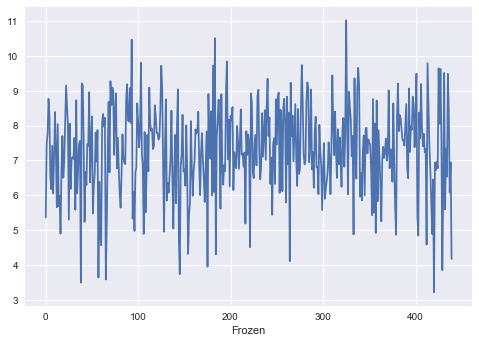

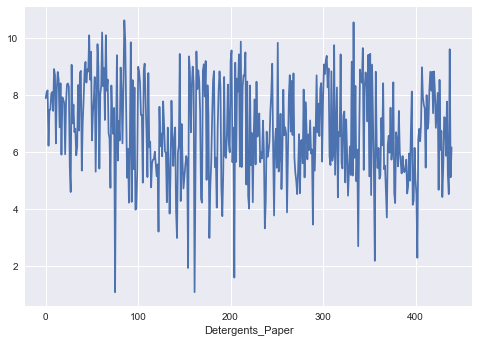

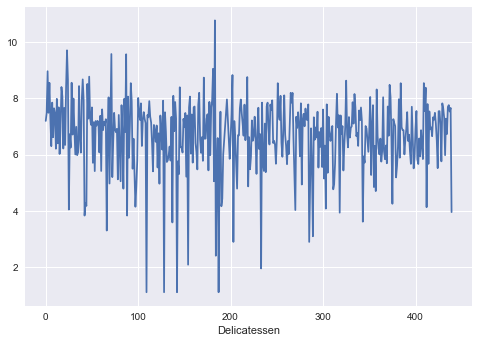

In [546]:
import matplotlib.pyplot as plt
for i in headers:
    plt.plot(list(log_data[i]))
    plt.xlabel(i)
    plt.show()

##### Observation

We see certain outliers points represented in plots above that is applicable across multiple features. And they are fairly visible when data points matching outliers are displayed.

More points to outliers must be added only if they are properly justified.

Whatever outliers we have obtained, it is better to discard them. For clustering algorithm like k-means where data points gets clustered by calculating the minimum mean between centroid and data points, presence of outliers will change 
the calculation of the mean and will lead to incorrect results. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

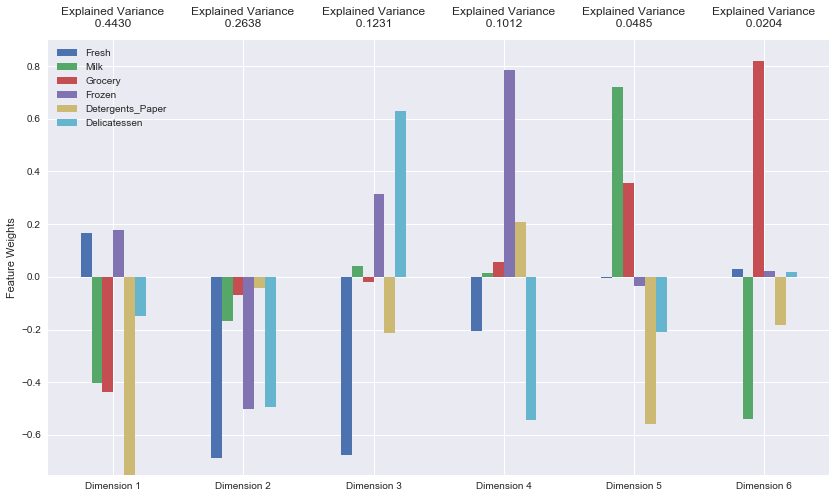

In [547]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6, whiten=True, random_state=42).fit(good_data)

# Perform pca transform on good data
original_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

##### Dimension 1
Here, the variance increases with the decrease in 2 values i.e. Grocery and Detergents_Paper. These establishments looks like they do not deal with daily business between shops and customers. These could include some kind of short-term vendors that operates for a short period of time. This component explains 44.30% of variance.

##### Dimension 2:
Here, the variance increases with the decrease in fresh and frozen products and a bit of delicatessan. These are kind of grocery establishments that maintains products that can be consumed daily. Moreover, some departmental or local markets. This component explains 26.30% of variance.

##### Dimension 3:
Here, the variance is increased by the increase in Delicatessen. These establishments mostly fast-food chains that prepares fast-foods like breads, burgers and sandwiches and other like cafeterias. Such establishments tends to include frozen food products a bit for quick delivery. This component explains 12.31% of variance.

##### Dimension 4:
Here, the variance is increased by the increase in Frozen values. These are mostly hypermarkets and supermarketswhere consumer shops daily. Also, consumers are not only end-user but also retailers and local departmental stores. This component explains 10.12% of variance.

Dimension 1 and 2 clearly explains Fresh and Frozen are related. Presence of either of them affects the other feature.

From the first four components, Fresh, Frozen and Delicatessen shows some of kind of relationship both in the positive and negative directions.

Further, an increase in Grocery do show some kind of movement in Detegents_Paper and Milk.

To be specific, first component explains 44.3% and second component explains 26.38% of variance individually.

So, first and second components constitutes (44.3 + 26.38 = 70.68)% of variance.

To conclude, the last 2 components (5 & 6) has the least variance so we can ignore them from our iteration.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [548]:
# Display sample log-data after having a PCA transformation applied
original_data = pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values)
display(original_data)

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.5403,-0.8096,0.8302,-0.2811,0.4638,-0.2578
1,-2.0407,-1.6699,-0.9102,0.6233,0.7534,0.5126
2,-0.1281,-0.5363,-0.7902,-1.6702,2.1244,1.7111


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [549]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [550]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-3.2813,-1.3308
1,-4.3474,-2.7451
2,-0.2730,-0.8816


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

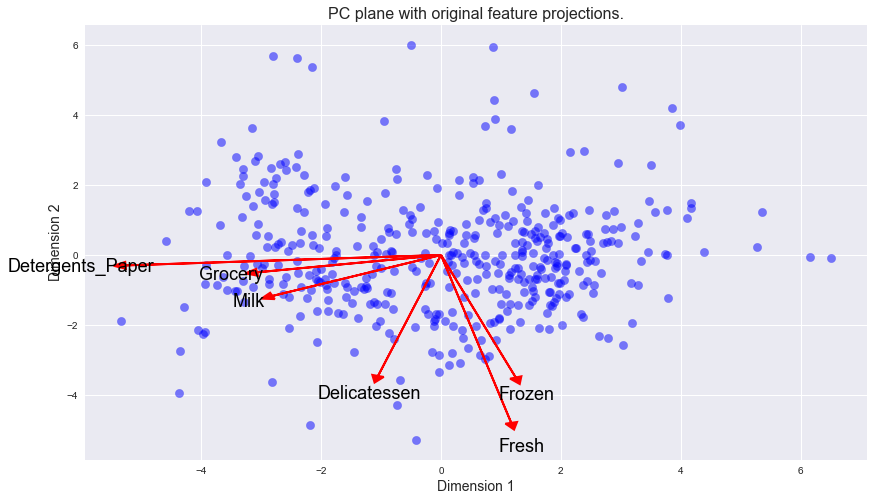

In [551]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Answer:**

Comparing biplot and first component, Milk, Grocery and Detergents_Papers stills shows strong correlation, followed by Delicatessan. Rest of the features falls in the negative region. It means Milk, Grocery and Detergents_Paper can be used to study the patterns of customer's spending habits.

Second component does not matched to the biplot above. It appears that Fresh and Frozen will determine the spending habits of customers. In short, second component did not validate that customer spends on Milk, Grocery and Detergents_Paper. Instead, customer spends highly on Delicatessan, Frozen and Fresh which is clearly not represented by the prediction score obtained above and the second component.

Yes, one of the component from pca_results fits with biplot and helps to validate the results.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

###### K-Means
- K-means is linear in the number of data objects i.e its performance is O(n) where n is number of objects.
- It minimizes the euclidean distance between the centroid and data points and allocates clusters accordingly.
- Hence, K-means performs well with large datasets.
- But yes, K-means requires number of clusters to be defined before we start with clustering.

###### Gaussian Mixture Model
- When we do not know what number of clustering will help to create clusters, GMM here is helpful.
- GMM confirms if variance exists between variables. Variance is the measure of performance in the longer term.
- GMM works by assigning weights to each data points.
- Unlike K-means, GMM finds two Gaussians that best fit your data.

Moving ahead, K-means falls under hard clustering whereas GMM falls unders soft-clustering.
##### Hard-clustering
- A single data point belongs to one and only cluster.
- Works by comparing distance between centroid and data point.

##### Soft-clustering
- A single data point belongs to more than one cluster at a time.
- Works the concept of maximum likelihood of a point that can belong to clusters.


##### What is the appropriate algorithm for our dataset?
We do have overlapping datapoints which is visible from the biplot.
There is a probability that these points may get clustered into wrong clusters. Also, it is even possible that data points may belong to multiple clusters and this is valid too.
GMM is a good option to start with. Also, GMM uses k-means as initialization setting.

Below I will be using both of the algorithms to validate further.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [552]:
# GMM clustering implementation
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

for n in [2,3,4,5,6,7]:
    clusterer = GaussianMixture(n_components=n, init_params='kmeans', random_state=42).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    # 1. Predicted over pca_samples
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print "silhouette_score for {} clusters: {}".format(n, score)

silhouette_score for 2 clusters: 0.421916846463
silhouette_score for 3 clusters: 0.404248738241
silhouette_score for 4 clusters: 0.293269564847
silhouette_score for 5 clusters: 0.300456388725
silhouette_score for 6 clusters: 0.326139450471
silhouette_score for 7 clusters: 0.324227205384


In [529]:
# This is just to evaludate the silhouette score of k-means.
# COMMENTING OUT:

# k-means clustering implementation
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# for n in [2,3,4,5,6,7]:
#     # TODO: Apply your clustering algorithm of choice to the reduced data 
#     clusterer = KMeans(n_clusters=n, init='random', random_state=42).fit(reduced_data)

#     # TODO: Predict the cluster for each data point
#     preds = clusterer.predict(reduced_data)

#     # TODO: Find the cluster centers
#     centers = clusterer.cluster_centers_

#     # TODO: Predict the cluster for each transformed sample data point
#     sample_preds = clusterer.predict(pca_samples)

#     # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
#     score = silhouette_score(reduced_data, preds)
#     print "silhouette_score for {} clusters: {}".format(n, score)

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

- silhouette_score for 2 clusters: 0.421916846463
- silhouette_score for 3 clusters: 0.404248738241
- silhouette_score for 4 clusters: 0.293269564847
- silhouette_score for 5 clusters: 0.300456388725
- silhouette_score for 6 clusters: 0.326139450471
- silhouette_score for 7 clusters: 0.324227205384

Cluster 2 has the highest silhouette score as `0.421`

Also, we do note that inter-cluster distance is above 0. Score 0 indicates that clusters overlaps. So, our clusters will not overlap.

In [553]:
# Hence, running iteration with cluster value as 2...

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

n = 2
clusterer = GaussianMixture(n_components=n, init_params='kmeans', random_state=42).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
# 1. Predicting over pca_samples
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print "silhouette_score for {} clusters: {}".format(n, score)

silhouette_score for 2 clusters: 0.421916846463


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

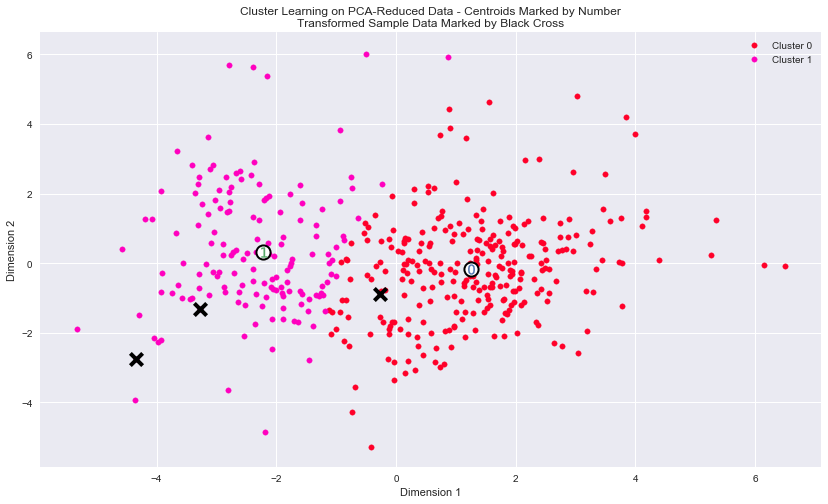

In [554]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [555]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)
# print true_centers

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8953.0,2114.0,2765.0,2075.0,353.0,732.0
Segment 1,3552.0,7837.0,12219.0,870.0,4696.0,962.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

Comparing these values with the mean calculated in Data Exploration section:

##### Segment 0
Features mentioned in this segement are below as compared to mean values calculated earlier.
It looks like these establishments purchases all of these products. They are moreover retaurants that server every type of food options.

##### Segment 1
Milk, Grocery and Detergents_Paper crosses the mean value. Cafeterias and Fast-food chain that deals with Milk products with sandwiches and burgers constitutes this segment.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

##### Inspecting sample data points:

In [556]:
print "PCA samples:"
print pca_samples

print "Centers:"
print centers

print "Sample data points:"
print samples

PCA samples:
[[-3.28131752 -1.33084252]
 [-4.34735796 -2.74508625]
 [-0.27298243 -0.88159639]]
Centers:
[[ 1.2512378  -0.18013806]
 [-2.22116886  0.31977698]]
Sample data points:
   Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   5181  22044    21531    1740              7353          4985
1  35942  38369    59598    3254             26701          2017
2  29526   7961    16966     432               363          1391


Here, pca_samples were plotted properly in the 2 dimensional space by the cluster_centers.

Comparing every sample with the biplot derived above:

- samples[0] shows Milk, Grocery and Detergents_Paper are above mean value calculated. Due to their heavy weights towards left of the biplot, they move more towards the left, thus making them to be a part of Segment 1.


- samples[1] shows most of the features crossing mean values. But comparing features like Milk, Grocery and Detergents_Paper specifically, again these inclines towards Segment 1.


- samples[2] shows high amount Fresh purchase amount. Other features like Milk, Detergents_Paper do shows some variations towards the left of the biplot. Since we have high weightage of Fresh amount, this datapoints shifts towards Segment 0 of the biplot.

In [557]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

Predictions made using GMM and biplot do remain consistent.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

A/B tests works on the sub-population taken out of the population to study how will it affect the sub-population for any given change.

Not all the customers will be affected equally.

For example, at the start of the project, we were asked to pick random 3 datapoints out of 440 datapoints. So, 3 datapoints is a subpopulation to overall 440 population.

When these samples and original datapoints were transformed, normalized and dimensionalized, we plotted them in a 2-D space to study where each features tends to move.

Then, we created clusters and segmented our datapoints. This segments helps to understand if new subpopulation comes in, we can freely feed them in our PCA created. Finally, new datapoints be made to appear under segments matching their behaviour.

Behaviour is nothing but what type establishments does each segments represents. Comparing new datapoints to these datapoints helps us to understand what type of customers they will be.

In the final step, we fed our 3 sample datapoints to PCA to understand to which segments do they match.

Restaurants and Cafeterias that need continuous supply of Groceries and Milk will be affected due to this change in delivery as these products are not preserved over multiple days. Such establishments also do need Detergents_Paper in heavy stock. This will definitely affect these customers.

Frozen and Delicatessen can be preserved over multiple days, so they won't be affected. These customers will react positively.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

Customer segments creates a well-defined division wherein there will be customers that will be focusing on fixed amount of products.
Here, division is nothing but the segments.

Such segment will the target variable.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

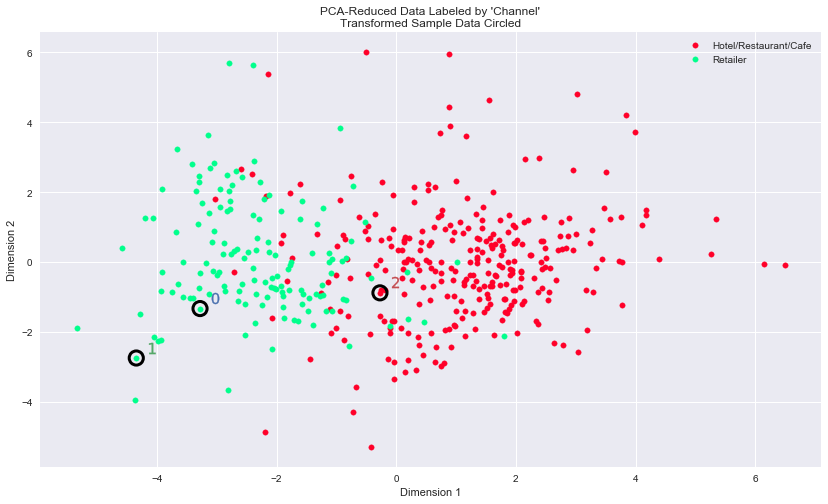

In [558]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

This is a kind of problem (segmentation) that will have overlapping datapoints. That means that there will be customers purchasing all of these products as a single point of destination.

Also, there are customers which deals with specific type of products i.e only Frozen and Delicatessen is appreciated where there are bakeries and burgers shops.

It makes sense if we make division for different types of customers we have.

These classifications helps to classify new customers.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.